In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

data = pd.read_csv('california_wine.csv')
data.head()

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
0,2020,216299,GRAPESWINE,1,Alameda,2530.0,5.14,13000.0,1497.69,Tons,19470000
1,2020,216299,GRAPESWINE,5,Amador,5360.0,2.31,12400.0,1318.31,Tons,16347000
2,2020,216299,GRAPESWINE,9,Calaveras,579.0,3.06,1770.0,1325.99,Tons,2347000
3,2020,216299,GRAPESWINE,11,Colusa,747.0,6.02,4500.0,684.67,Tons,3081000
4,2020,216299,GRAPESWINE,13,ContraCosta,1940.0,4.69,9090.0,751.27,Tons,6829000


"california_wine.csv" contains datas of grapes production in California in years 1980-2020.

link: https://www.kaggle.com/datasets/jarredpriester/california-wine-production-19802020


Creating and train linear regression model of Yield to Production.


In some rows of the dataset there are missing values in Production or Yield. Creating linear regression model we need to skip these  rows.

In [2]:
#selecting rows without NaN
data = data[data['Yield(Unit/Acre)'].notna()]
data = data[data['Production'].notna()]

X = data['Yield(Unit/Acre)'].values.reshape(-1,1)[:1000]
y = data.Production.values.reshape(-1)[:1000]

#scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LinearRegression()

model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

LinearRegression()

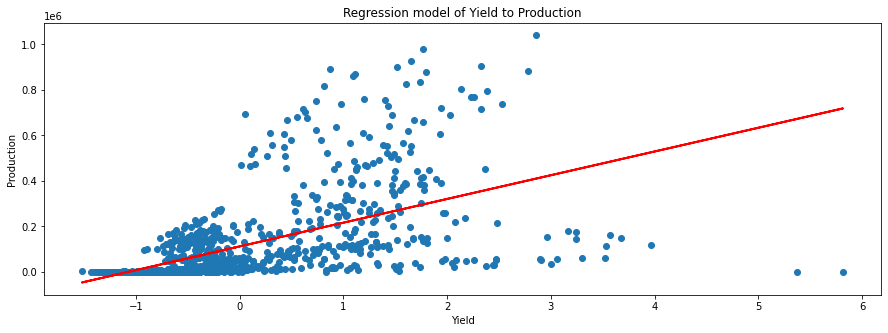

Slope: 104368.49804
Intercept: 111957.92600
Score train: 0.30613
Score test: 0.34340
Mean squared error equals: 23384214616.49574


In [78]:
#resizing figure
plt.rcParams["figure.figsize"] = (15, 5)

#plotting
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Regression model of Yield to Production')
plt.xlabel('Yield')
plt.ylabel('Production')
plt.show()

print('Slope: %.5f' % model.coef_[0])
print('Intercept: %.5f' % model.intercept_)
print('Score train: %.5f' % model.score(X_train, y_train))
print('Score test: %.5f' % model.score(X_test, y_test))
print('Mean squared error equals: %.5f' % mean_squared_error(y, model.predict(X)))

#setting initial size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


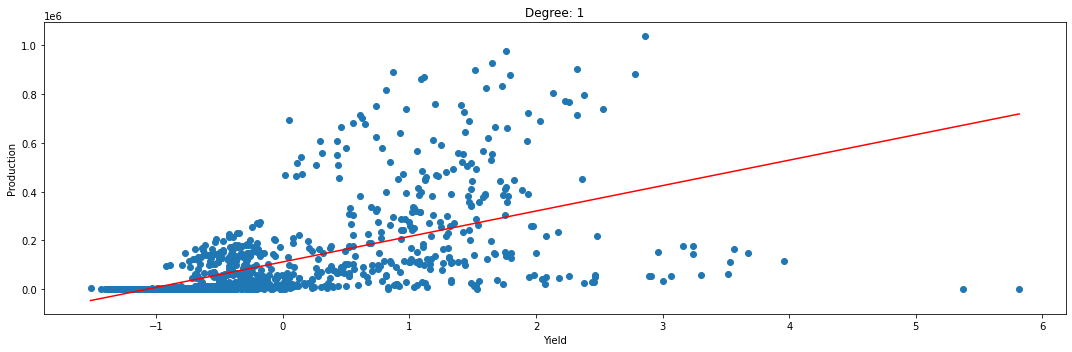

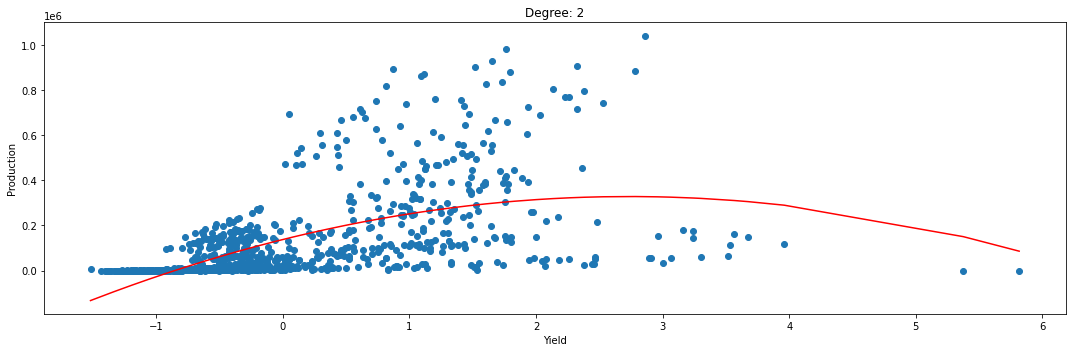

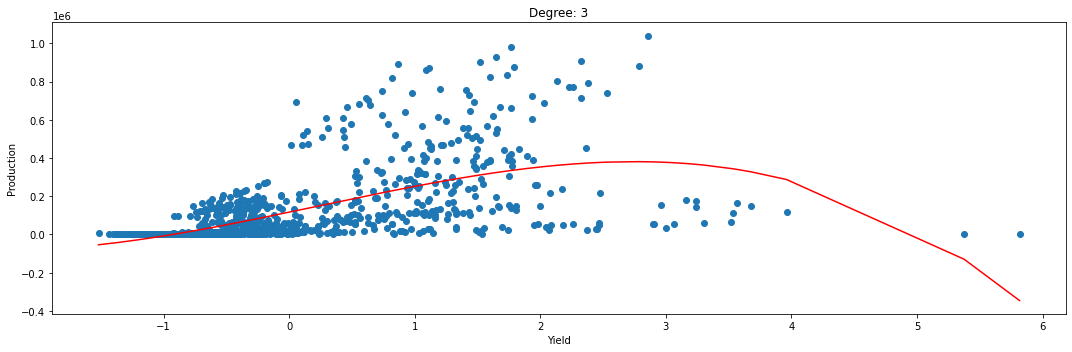

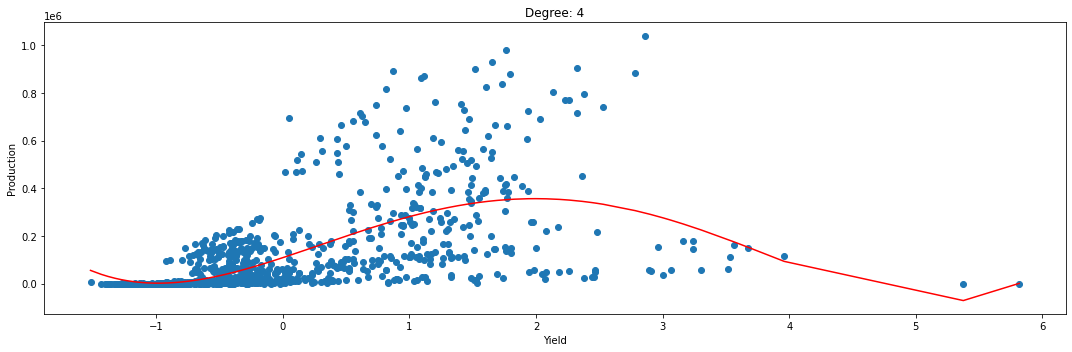

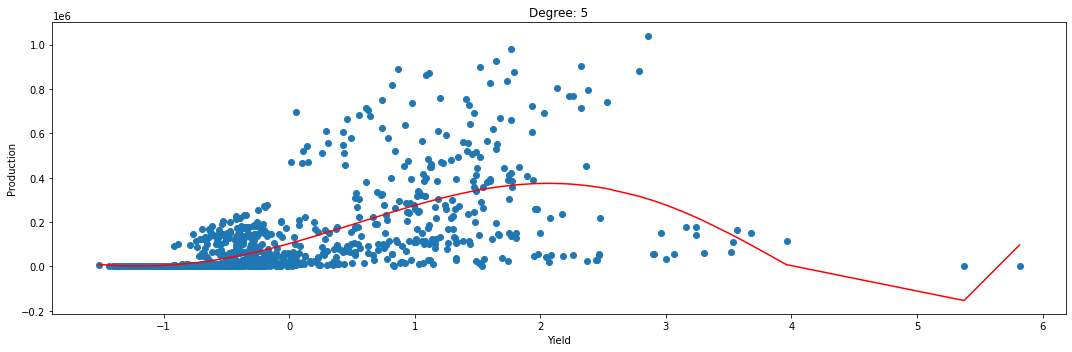

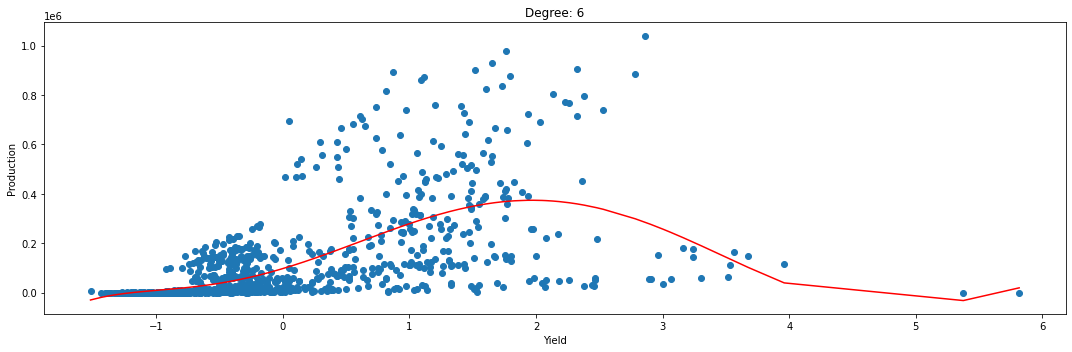

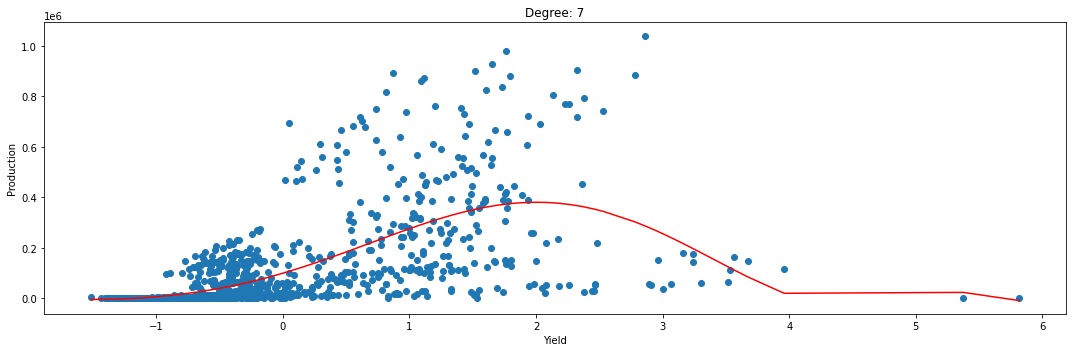

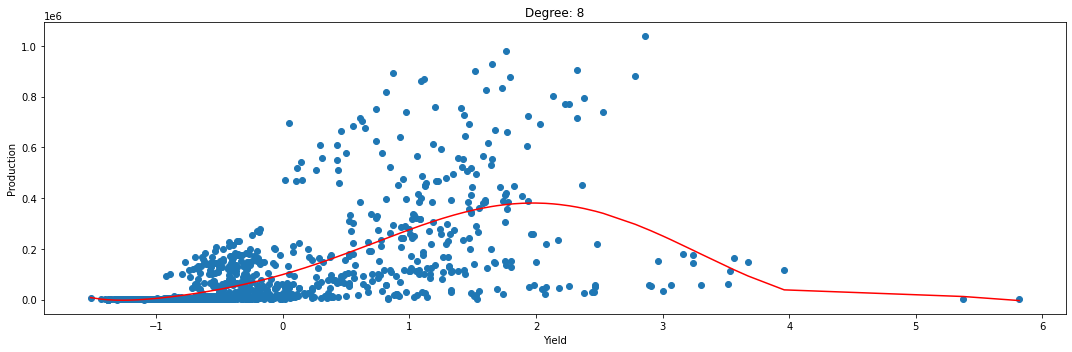

In [4]:
error = np.array([0, 0, 0, 0, 0, 0, 0, 0])

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    model2 = LinearRegression().fit(X_order,y)

    y_pred = model2.predict(X_order)

    #sorting
    x_pd = pd.Series(X.flatten())
    y_pred_pd = pd.Series(y_pred.flatten())

    x_sorted = x_pd.sort_values()

    Y_pred = np.array(y_pred_pd[x_sorted.index])
    x_arr = np.array(x_sorted)

    #error
    error[order-1] = mean_squared_error(y, y_pred)
    #plotting
    plt.rcParams["figure.figsize"] = (15, 5)
    plt.scatter(X, y)
    plt.plot(x_arr, Y_pred, color='red')
    plt.title('Degree: %i' %order)
    plt.xlabel('Yield')
    plt.ylabel('Production')
    plt.tight_layout()
    plt.show()

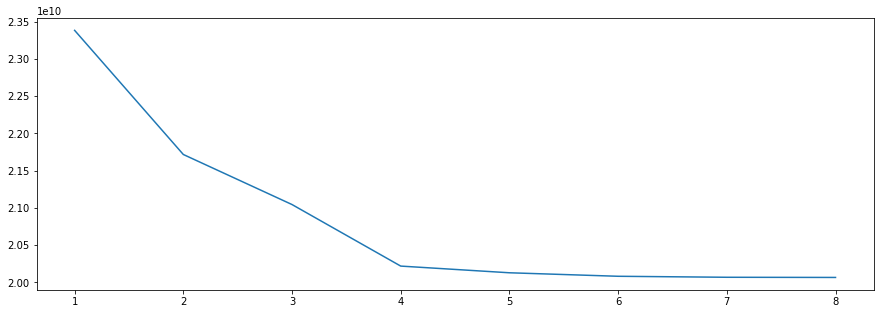

In [5]:
plt.rcParams["figure.figsize"] = (15, 5)

degrees = np.array([1, 2, 3, 4, 5, 6, 7, 8])

plt.plot(degrees, error)
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

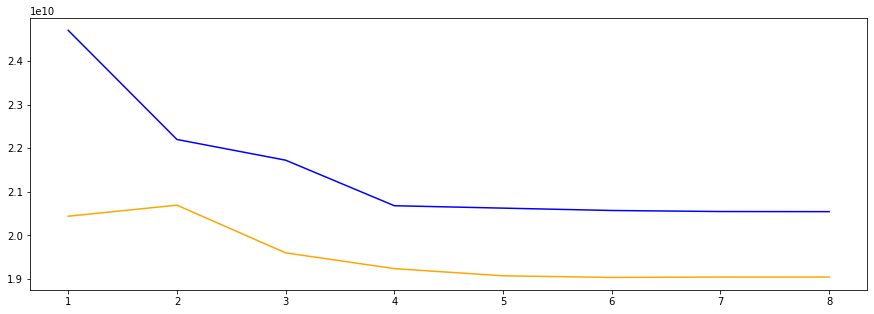

In [6]:
error_train = np.array([0, 0, 0, 0, 0, 0, 0, 0])
error_test = np.array([0, 0, 0, 0, 0, 0, 0, 0])

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model_tr = LinearRegression().fit(X_train, y_train)
    model_te = LinearRegression().fit(X_test, y_test)

    y_train_pred = model_tr.predict(X_train)
    y_test_pred = model_tr.predict(X_test)

    #error
    error_train[order-1] = mean_squared_error(y_train, y_train_pred)
    error_test[order-1] = mean_squared_error(y_test, y_test_pred)

plt.rcParams["figure.figsize"] = (15, 5)

degrees = np.array([1, 2, 3, 4, 5, 6, 7, 8])

#train error - orange
plt.plot(degrees, error_train, color='blue')

#test error - blue
plt.plot(degrees, error_test, color='orange')

plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Both train error and test error is smaller and more stabile sinece 4 degree.

Regularization lasso:

In [119]:
LassoCV,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

lasso_cv_model = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv_model.fit(X_train, y_train)

# best alpha parameter
print("Optimal value of alpha: %.5f" %lasso_cv_model.alpha_)
y_pred_lasso= lasso_cv_model.predict(X_test)
lasso = Lasso(alpha = lasso_cv_model.alpha_)
lasso.fit(X_train, y_train)

Optimal value of alpha: 71.95203


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=71.95203083791903)

In [118]:
print("Train score: %.5f" %lasso.score(X_train, y_train))
print("Test score: %.5f" %lasso.score(X_test, y_test))
print("Mean squared error: %.5f" %mean_squared_error(y_test, y_pred_lasso))

Train score: 0.30666
Test score: 0.34057
Mean squared error: 23575685768.50722


Regularization ridge:

In [123]:
#optimal alpha
alpha = ridge_cv.alpha_
print("Optimal value of alpha: %.5f" %alpha)

ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

Optimal value of alpha: 0.11522


In [124]:
print("Train score: %.5f" %ridge.score(X_train, y_train))
print("Test score: %.5f" %ridge.score(X_test, y_test))
print("Mean squared error: %.5f" %mean_squared_error(y_test, y_pred_ridge))

Train score: 0.30667
Test score: 0.34058
Mean squared error: 23557694251.73296


Regularization Elastic Net:

In [73]:
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)
elastic_model.fit(X_train, y_train)

elastic_model.l1_ratio_

y_pred_elastic=elastic_model.predict(X_test)

In [85]:
print("Train score: %.5f" %elastic_model.score(X_train, y_train))
print("Test score: %.5f" %elastic_model.score(X_test, y_test))
print("Mean squared error: %.5f" %mean_squared_error(y_test, y_pred_elastic))

Train score: 0.30661
Test score: 0.34025
Mean squared error: 23569516428.29977


In [120]:
data = [['Linear', 0.30613, 0.34340], ['Lasso', 0.30666, 0.34057], ['Ridge', 0.30667, 0.34058], ['Elastic Net', 0.30661, 0.34025]]
summary = pd.DataFrame(data, columns=['Model', 'Train score', 'Test score'])
summary

,Model,Train score,Test score
0,Linear,0.30613,0.34340
1,Lasso,0.30666,0.34057
2,Ridge,0.30667,0.34058
3,Elastic Net,0.30661,0.34025


The scores of model are very similar, after the regularizations they are slightly higher in most cases. That means the regression model has been well trained over the training data and there is no problem with overfitting. 